In [1]:
pip install tensorflow


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical


In [3]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 58s 80ms/step - accuracy: 0.3118 - loss: 1.8619 - val_accuracy: 0.4412 - val_loss: 1.5899
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 80s 78ms/step - accuracy: 0.5185 - loss: 1.3390 - val_accuracy: 0.5770 - val_loss: 1.2076
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.5914 - loss: 1.1485 - val_accuracy: 0.6142 - val_loss: 1.1024
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 54s 77ms/step - accuracy: 0.6354 - loss: 1.0418 - val_accuracy: 0.6326 - val_loss: 1.0867
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.6683 - loss: 0.9431 - val_accuracy: 0.6776 - val_loss: 0.9343
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 84s 79ms/step - accuracy: 0.6965 - loss: 0.8699 - val_accuracy: 0.6892 - val_loss: 0.8885
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 80s 77ms/step - accuracy: 0.7109 - loss: 0.8203 - val_accuracy: 0.7042 - val_loss: 0.8530
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 54s 77ms/step - accuracy: 0.7295 - loss: 0.7684 - 

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6964 - loss: 0.8768
Test accuracy: 0.6949999928474426


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted class: ship


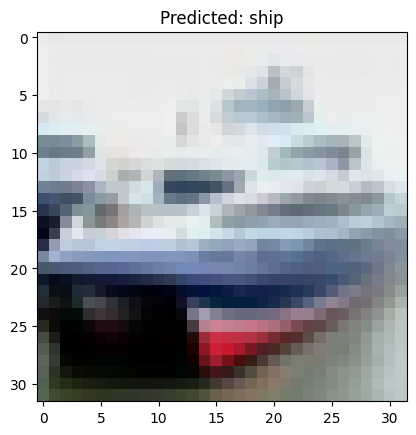

In [9]:
# Pick a test image
test_image = test_images[1].reshape(1, 32, 32, 3)

# Predict the class
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions)

# Class labels in CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Predicted class: {class_names[predicted_class]}")

# Display the image
plt.imshow(test_image.reshape(32, 32, 3))
plt.title(f"Predicted: {class_names[predicted_class]}")
plt.show()
